# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [1]:
# Resolver acá
import wbdata

paises = ["BRA", "URY"]
indicadores = {
    "NY.GDP.PCAP.CD": "PIB per cápita",
    "FP.CPI.TOTL": "Indice de Precios al Consumidor"
}

datos = wbdata.get_dataframe(indicadores, country=paises)

datos_brasil = datos.loc["Brazil"]
datos_uruguay = datos.loc["Uruguay"]

print("Datos económicos de Brasil:")
print(datos_brasil.head())

print("Datos economicos de Uruguay:")
print(datos_uruguay.head())

Datos económicos de Brasil:
      PIB per cápita  Indice de Precios al Consumidor
date                                                 
2023    10294.866681                       213.875135
2022     9281.333344                       204.482121
2021     7972.536650                       187.117425
2020     7074.193783                       172.774291
2019     9029.833267                       167.397860
Datos economicos de Uruguay:
      PIB per cápita  Indice de Precios al Consumidor
date                                                 
2023    22797.811173                       277.191092
2022    20691.973899                       261.824350
2021    17888.211510                       239.976021
2020    15789.685742                       222.719877
2019    18315.735286                       202.921983


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [2]:
# Resolver acá
import pandas as pd

descripcion_brasil = datos_brasil.describe()
descripcion_uruguay = datos_uruguay.describe()

print("Estadistica descriptiva de Brasil")
print(descripcion_brasil)

print("Estadistica descriptiva de Uruguay")
print(descripcion_uruguay)

print("") #Esto lo agregue para que haya espacio entre la comparacion y la estadistica descriptiva
print("")

comparacion = pd.concat([descripcion_brasil, descripcion_uruguay], keys= ["Brasil", "Uruguay"])
print("Esta es la comparacion entre Brasil y Uruguay:")
print(comparacion)

Estadistica descriptiva de Brasil
       PIB per cápita  Indice de Precios al Consumidor
count       64.000000                     4.400000e+01
mean      4151.918500                     7.064479e+01
std       3847.072417                     6.567639e+01
min        231.564063                     3.572040e-10
25%       1342.451702                     3.790331e-03
50%       2583.937628                     5.849626e+01
75%       7158.068164                     1.141419e+02
max      13396.624357                     2.138751e+02
Estadistica descriptiva de Uruguay
       PIB per cápita  Indice de Precios al Consumidor
count       64.000000                        64.000000
mean      6447.228972                        52.533922
std       6559.552210                        75.402761
min        491.031760                         0.000004
25%       1410.000826                         0.002745
50%       3699.784431                         5.788026
75%       8233.660281                        82.745

#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

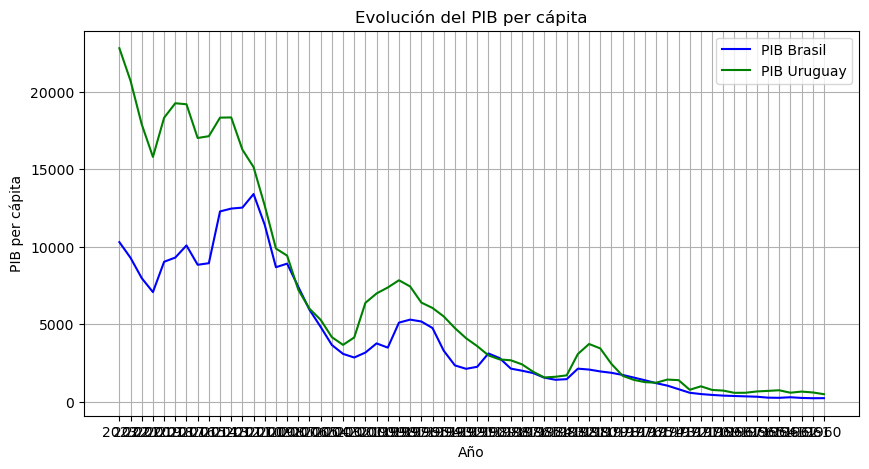

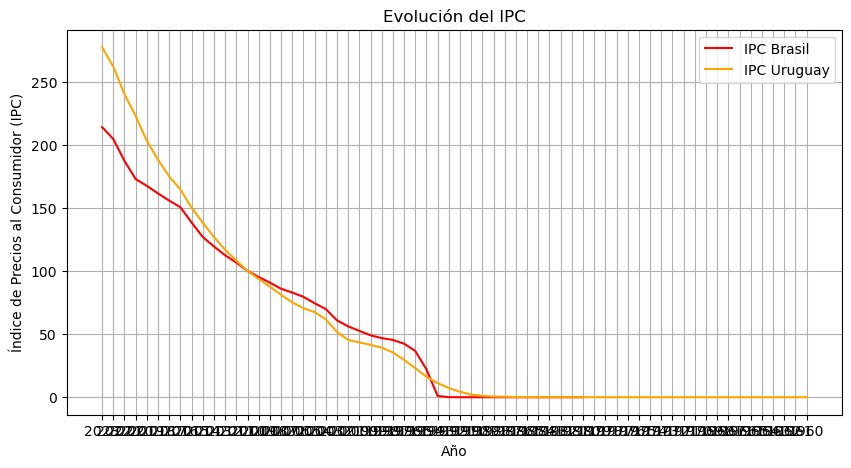

In [9]:
# Resolver acá estilo pyplot

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(datos_brasil.index, datos_brasil["PIB per cápita"], label="PIB Brasil", color='blue')
plt.plot(datos_uruguay.index, datos_uruguay["PIB per cápita"], label="PIB Uruguay", color='green')
plt.ylabel("PIB per cápita")
plt.xlabel("Año")
plt.title("Evolución del PIB per cápita")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(datos_brasil.index, datos_brasil["Indice de Precios al Consumidor"], label="IPC Brasil", color='red')
plt.plot(datos_uruguay.index, datos_uruguay["Indice de Precios al Consumidor"], label="IPC Uruguay", color='orange')
plt.ylabel("Índice de Precios al Consumidor (IPC)")
plt.xlabel("Año")
plt.title("Evolución del IPC")
plt.legend()
plt.grid()
plt.show()

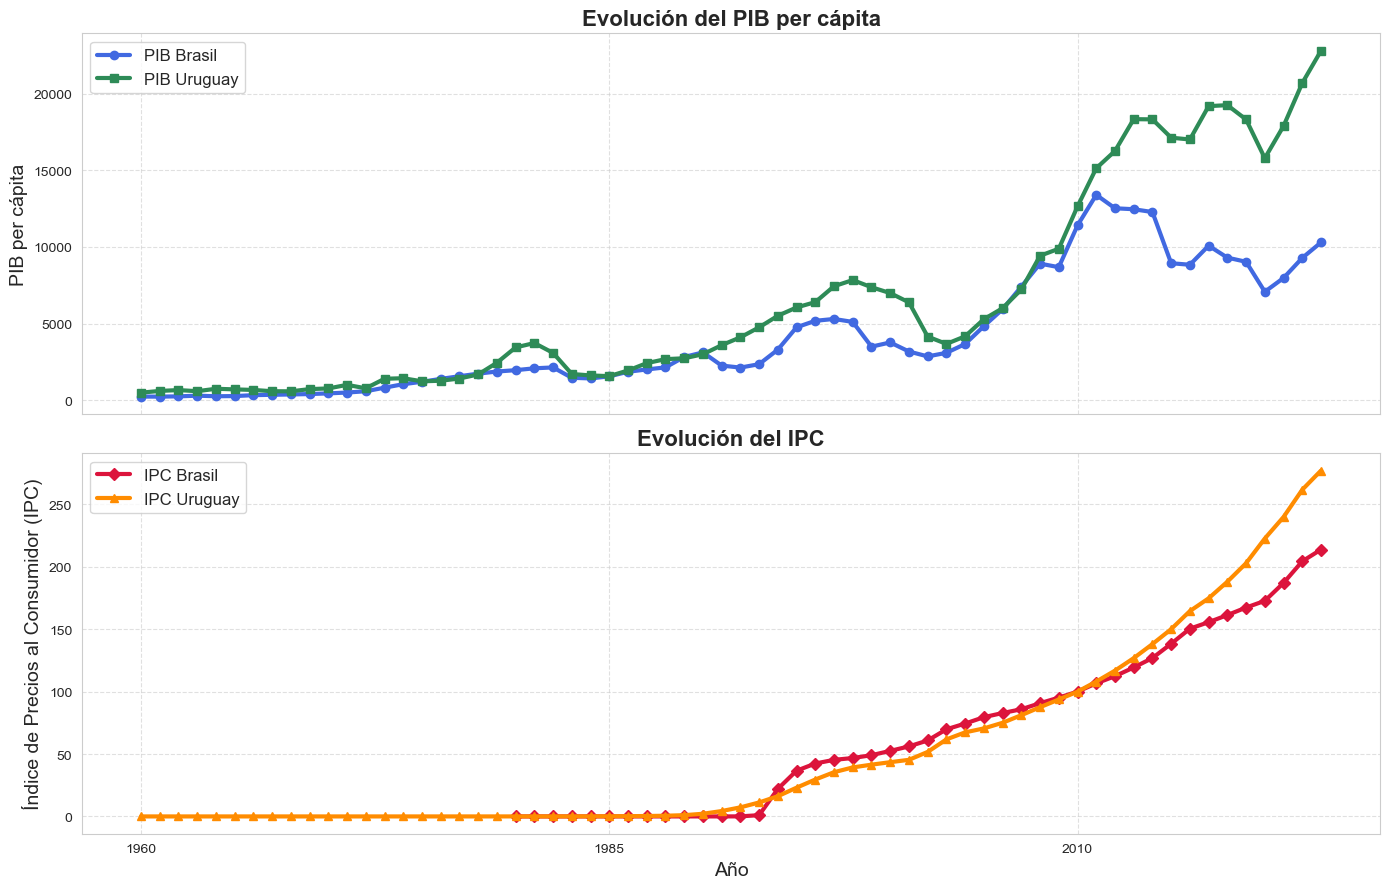

In [11]:
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("deep")

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 9), sharex=True)

datos_brasil = datos_brasil.sort_index()
datos_uruguay = datos_uruguay.sort_index()

ax[0].plot(datos_brasil.index, datos_brasil["PIB per cápita"], label="PIB Brasil", color='royalblue', linewidth=3, marker='o', markersize=6)
ax[0].plot(datos_uruguay.index, datos_uruguay["PIB per cápita"], label="PIB Uruguay", color='seagreen', linewidth=3, marker='s', markersize=6)
ax[0].set_ylabel("PIB per cápita", fontsize=14)
ax[0].set_title("Evolución del PIB per cápita", fontsize=16, fontweight='bold')
ax[0].legend(frameon=True, fontsize=12, loc='upper left')
ax[0].grid(True, linestyle='--', alpha=0.6)

ax[1].plot(datos_brasil.index, datos_brasil["Indice de Precios al Consumidor"], label="IPC Brasil", color='crimson', linewidth=3, marker='D', markersize=6)
ax[1].plot(datos_uruguay.index, datos_uruguay["Indice de Precios al Consumidor"], label="IPC Uruguay", color='darkorange', linewidth=3, marker='^', markersize=6)
ax[1].set_ylabel("Índice de Precios al Consumidor (IPC)", fontsize=14)
ax[1].set_xlabel("Año", fontsize=14)
ax[1].set_title("Evolución del IPC", fontsize=16, fontweight='bold')
ax[1].legend(frameon=True, fontsize=12, loc='upper left')
ax[1].grid(True, linestyle='--', alpha=0.6)

for axis in ax:
    axis.set_xticks(axis.get_xticks()[::5])

plt.tight_layout()
plt.show()

### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
# Resolver acá
